#Dinámica molecular

La dinámica molecular es una técnica que se usa para simular el comportamiento de sistemas de átomos y moléculas. Si se conocen los potenciales de interacción entre las moléculas (es posible calcularlos con técnicas de *primeros principios*) se pueden integrar las ecuaciones de movimiento clásicas para estudiar la evolución temporal de las posiciones y velocidades. Esta técnica es fundamental tanto en física como en química y biología para investigar propiedades termodinámicas y estructurales de sistemas complejos.

La dinámica molecular es un campo de estudio por sí mismo porque es de mucho interés tanto fundamental como para aplicaciones lograr tratar sistemas de un gran número de partículas o moléculas y tiempos largos. Además, en muchos casos de hay que tener en cuenta explícitamente la naturaleza cuántica de la materia, lo que agrega un grado de dificultad adicional.

El sistema se modela típicamente con un hamiltoniano de la forma:
$$
\mathcal{H}=\sum_{i=1}^N\frac{p_i^2}{2m}+ V(\{q_i\})
$$
donde los $p_i$ son coordenadas de impulso y los $q_i$ son las coordenadas de posición. El potencial $V(\{q_i\})$ puede en muchos casos de interés escribirse como una suma de potenciales de pares de moléculas. El problema se reduce a integrar las ecuaciones de Hamilton:
$$
\frac{dq_i}{dt} = \frac{\partial H}{\partial p_i}
$$

$$
\frac{dp_i}{dt} = -\frac{\partial H}{\partial q_i}
$$

 Para garantizar que las simulaciones sean precisas y confiables hay que integrar las ecuaciones de movimiento con cuidado. Vamos a ver algunos de los integradores más comunes que se usan para dinámica molecular como los métodos de *Leapfrog*,  *Verlet* y sus variantes, que son conocidos por ser eficientes y por conservar la energía del sistema mucho mejor que métodos de orden superior como el Runge-Kutta 4.

Ese es un punto importante a tener en cuenta porque en general estamos tratando con sistemas conservativos. Vamos a buscar que el método de integración numérica preserve las constantes de movimiento (dentro de la precisión del método). Si el método elegido no conserva la energía, en particular si la energía va aumentando o disminuyendo con el paso de integración, para tiempos largo vamos a tener resultados no físicos. En un estudio de la dinámica del sistema solar, se nos puede caer la algún planeta al Sol.







##Métodos simplécticos

Los métodos simplécticos son una clase de métodos de integración numérica especialmente adaptados para resolver sistemas hamiltonianos.

La evolución temporal de un sistema hamiltoniano es equivalente a una transformación canónica que nos lleva de las condiciones iniciales a las finales. Estas transformaciones preservan las constantes de movimiento y el volumen del espacio de las fases ([teorema de Liouville](https://en.wikipedia.org/wiki/Liouville%27s_theorem_(Hamiltonian))).

![Liouville](https://upload.wikimedia.org/wikipedia/commons/f/f7/Hamiltonian_flow_classical.gif)

Los métodos de Leapfrog y Verlet preservan el impulso angular y lineal, así como el volumen del espacio de las fases, pero no preservan la energía de manera exacta (típicamente la energía tiene oscilaciones).

#### Integración de Verlet
Un método simpléctico muy utilizado es el de Verlet. El algoritmo básico de Verlet surge de hacer un desarrolo en serie de la posición $x(t)$:
$$
x(t + h) = x(t) + h \dot{x}(t) + (h^2 /2)\ddot{x}(t) + \mathcal{O}(h^3).
$$
Haciendo el desarrollo para $x(t - h)$ (cambia el signo de las potencias impares de $h$), sumando y reordenando tenemos:
$$
x(t + h) = 2 x(t)- x(t-h) + h^2 \ddot{x}(t) + \mathcal{O}(h^4)
$$
La velocidad no aparece en el método, pero podemos obtenerla haciendo diferencias finitas:
$$
\dot{x}(t)=\frac{x(t+h)-x(t-h)}{2h}+\mathcal{O}(h^2)
$$
en caso de necesitarla.  

Una característica de este método es que necesitamos las posiciones en *los *dos** tiempos previos $t-h$ y $t$ para obtener la posición a tiempo $t+h$. Las condiciones iniciales de un problema nos dan información a un tiempo dado solamente, pero podemos solucionar esto haciendo un primer paso de integración con otro método. La derivada segunda respecto al tiempo es conocida a través de la segunda ley de Newton.

####Integración de Leapfrog
Escribimos el desarrollo en serie de $x(t)$ de la forma
$$
x(t + h) = x(t) + h [\dot{x}(t) + (h /2)\ddot{x}(t)] + \mathcal{O}(h^3),
$$
pero haciendo medio paso de tiempo tenemos
$$
\dot{x}(t+h/2) =\dot{x}(t)+\frac{h}{2} \ddot{x}(t)+ \mathcal{O}(h^2)
$$
Así que podemos escribir la primera ecuación como:
$$
x(t + h) = x(t) + h \dot{x}(t+h/2) + \mathcal{O}(h^3)
$$
y usar
$$
\dot{x}(t+h/2) = \dot{x}(t-h/2) + h\ddot{x}(t) +\mathcal{O}(h^2)
$$
Estas expresiones nos dan la posición y la velocidad a tiempos distintos. De ahí viene el nombre Leapfrog porque velocidades y tiempo *saltan* una por encima de la otra. Si necesitamos la velocidad al mismo tiempo que la posición, siempre podemos hacer "medio" paso de Euler:
$$
\dot{x}(t) = \dot{x}(t\mp h/2)\pm (h/2)\ddot{x}(t).
$$
y se usa lo mismo para arrancar el método dadas las condiciones iniciales.

#### Verlet de velocidades

El verlet de velocidades es una variante más estable del método de Verlet. Calculando la velocidad usando la derivada centrada
$$
v(t) = \frac{x(t+h)-x(t-h)}{2h}
$$
tenemos
$$
x(t+h)= x(t)+ h v(t) +(h^2/2) \ddot{x}(t)
$$
$$
v(t+h)= v(t)+ \tfrac{h}{2} [\ddot{x}(t) + \ddot{x}(t+h)]
$$

O en forma vectorial:
\begin{align}
\mathbf{r}(t + h) &= \mathbf{r}(t) + \mathbf{v}(t)\, h + \tfrac{1}{2} \,\mathbf{a}(t) h^2, \\[6pt]
\mathbf{v}(t + h) &= \mathbf{v}(t) + \frac{\mathbf{a}(t) + \mathbf{a}(t + h)}{2} h.
\end{align}

donde $\mathbf{a}(t)$ es la aceleración en el tiempo $t$, que se puede calcular a partir de las fuerzas en el sistema.

No hace falta almacenar las fuerzas a dos tiempos distintos porque el algoritmo es equivalente a
\begin{align}
\mathbf{\tilde{v}}(t) &= \mathbf{v}(t) + \tfrac{h}{2} \mathbf{a}(t).\\
\mathbf{r}(t + h) &= \mathbf{r}(t) + h \mathbf{\tilde{v}}(t)  \\
\mathbf{v}(t + h) &= \mathbf{\tilde{v}}(t) + \tfrac{h}{2} \mathbf{a}(t+h)
\end{align}
y la aceleración $\mathbf{a}(t+h)$ se calcula entre el segundo y tercer paso.



## Simulación de dinámica molecular

#### Interacciones
Las interacciones entre moléculas pueden ser muy complicadas y en general hace falta recurrir a métodos especiales para determinarlas (Teoría de funcional densidad). Las interacciones pueden ser anisotrópicas (depender de la orientación de las moléculas), de muchos cuerpos (por ejemplo para los núcleos en un metal), dar lugar a reacciones químicas, etc.

A modo de ejemplo vamos a ver el potencial de Lennard-Jones (L-J),  que funciona muy bien para describir la interacción entre átomos de gas noble (He, Ar, Kr, Xe). Estos átomos tienen capa llena, así que no se combinan químicamente entre sí y su densidad de carga tiene simetría esférica.

El potencial de Lennard-Jones describe de manera aproximada la energía potencial de dos átomos de gas noble a distancia $r$
$$
V(r) =4\epsilon \left[\left(\frac{\sigma}{r}\right)^{12}-\left(\frac{\sigma}{r}\right)^{6}\right]
$$
donde los parámetros $\sigma$ y $\epsilon$ son escalas de longitud y energía, respectivamente. Estos parámetros dependen del tipo de átomo y se pueden estimar de datos experimentales.

A distancias grandes se esperaría un decaimiento exponencial de la interacción entre átomos y moléculas neutras si se consideran distribuciones estáticas de carga. Esto es porque la densidad electrónica decae exponencialmente con la distancia al núcleo (ver por ejemplo el átomo de hidrógeno).

Si embargo, el término atractivo en la interacción de L-J que domina para $r/\sigma\gg1$ decae mucho más lento. Este término viene de la interacción de van der Waals que es una interacción de origen cuántico asociada a la correlación de las fluctuaciones de los electrones alrededor de los nucleos. Se puede pensar como una interacción dipolo-dipolo, pero con dipolos que fluctúan en el tiempo.

El comportamiento del término repulsivo es fenomenológico y describe de manera aproximada cómo se modifica la energía del sistema cuando se solapan las distribuciones de carga de los átomos. Nuevamente, esto no se puede describir pensando clásicamente en distribuciones de carga. Los electrones son fermiones y por lo tanto no puede haber dos en el mismo estado. Eso hace que algunos electrones tengan que ocupar estados de más alta energía y de manera efectiva de un potencial repulsivo. Esto se conoce como repulsión de Pauli (por el principio de exclusión de Pauli). La potencia $1/r^{12}$ está elegida más por conveniencia matemática que por precisión.

Los potenciales realistas para moléculas pueden ser mucho más complicados que el de L-J y son muchas veces obtenidos de manera numérica (no se conoce una expresión analítica).

En muchos casos se usan potenciales simplificados, como por ejemplo el de esferas duras, que permiten entender aspectos fundamentales del comportamiento de sistemas de muchos cuerpos.



##### Potencial de Lennard-Jones

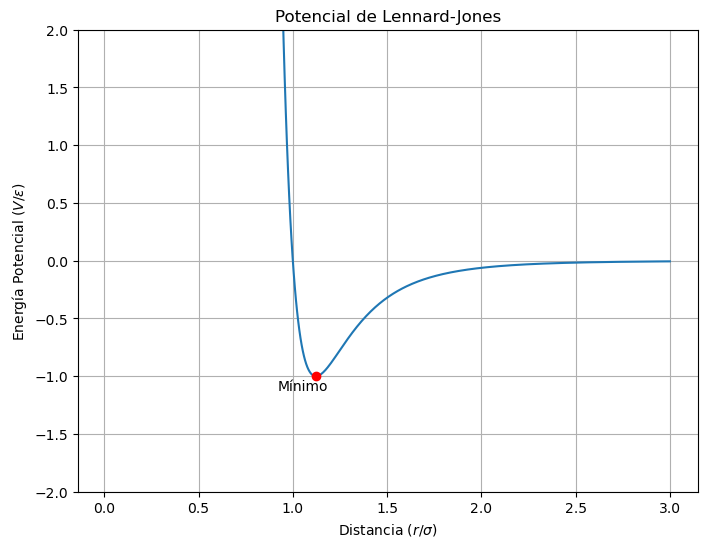

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def potencial_lennard_jones(r, epsilon, sigma):
    """Calcula el potencial de Lennard-Jones entre dos partículas."""
    return 4 * epsilon * ((sigma / r)**12 - (sigma / r)**6)

epsilon = 1.0  # Profundidad del pozo potencial
sigma = 1.0  # Distancia en la que el potencial es cero

# Generamos un array de distancias
r = np.linspace(0.01, 3.0*sigma, 500)

# Calculamos la energía potencial
V = potencial_lennard_jones(r, epsilon, sigma)

# Hacemos el gráfico del potencial
plt.figure(figsize=(8, 6))
plt.plot(r, V, label='Potencial de Lennard-Jones')

# Encontramos y marcamos el mínimo
r_min = r[np.argmin(V)]
V_min = np.min(V)
plt.plot(r_min, V_min, 'ro')
plt.annotate('Mínimo', (r_min, V_min), textcoords="offset points", xytext=(-10,-10), ha='center')

plt.title('Potencial de Lennard-Jones')
plt.xlabel('Distancia ($r/\\sigma$)')
plt.ylabel('Energía Potencial ($V/\\epsilon$)')
plt.ylim(-2*epsilon, 2*epsilon)
plt.grid(True)
plt.show()


#### Dimensiones
Por razones de simplicidad y de eficiencia es conveniente usar unidades adimensionales. No conviene lidiar por ejemplo con masas atómicas de $10^{-26}$ Kg porque vamos a tener problemas con la precisión numérica y si usamos variables de mayor precisión, vamos a enlentecer el código innecesariamente. El modelo de $L-J$ nos da una escala de longitud y otra de energía que podemos usar para adimensionalizar.

| Cantidad Física | Unidades de Lennard-Jones |
|---|---|
| Energía ($E$) | $\varepsilon$ |
| Distancia ($r$) | $\sigma$ |
| Tiempo ($t$) | $\sqrt{\frac{m\sigma^{2}}{\varepsilon}}$ |
| Velocidad ($v$) | $\sqrt{\frac{\varepsilon}{m}}$ |
| Fuerza ($F$) | $\frac{\varepsilon}{\sigma}$ |
| Temperatura ($T$) | $\frac{\varepsilon}{k_{B}}$ |
| Presión ($P$) | $\frac{\varepsilon}{\sigma^{3}}$ |
| Volumen ($V$) | $\sigma^{3}$ |
| Densidad de numéro ($\rho$) | $\sigma^{-3}$ |
| Temperatura ($T$)| $\frac{\epsilon}{k_b}$|

Para el caso particular de átomos de Argón, tenemos:

| Cantidad física   | Unidades de Lennard-Jones para Argón |
|-------------------|--------------------------------------|
| Energía ($E$)        | $1.65\times 10^{-21}$ J            |
| Distancia ($r$)      | $3.4\times 10^{-10} $ m             |
| Masa ($m$)          |  $6.6335209\times 10^{-26}$ kg      |
| Tiempo ($t$)          | $2.15 \times$ $10^{12}$ s       |
| Temperatura ($T$)   | $120$ Kelvin                        |

La fuerza que experimenta la partícula $k$ que está en la posición $\mathbf{r}_k$ debido a la partícula $j$ que está en $\mathbf{r}_j$ es
$$
\mathbf{F}_{kj}=-\nabla_k V(r_{kj})
$$
donde $r_{kj}=|\mathbf{r}_k-\mathbf{r}_j|$

Usando las unidades de Lennard-Jones tenemos
$$
m \ddot{\mathbf{r}}\to m \frac{\sigma}{\left(\sqrt{\frac{m \sigma^2}{\epsilon}}\right)^2}\ddot{\tilde{\mathbf{r}}}= \frac{\epsilon}{\sigma}\ddot{\tilde{\mathbf{r}}}
$$
con $\ddot{\tilde{\mathbf{r}}}$ adimensional.
Mientras que
$$
\begin{align}
\mathbf{F}_{kj}&=-\nabla_k V(r_{kj})\\ &= - \frac{dV(r_{kj})}{dr_{kj}}\hat{r}_{kj}\\ &= 4 \epsilon \left( 12\,{\frac {{\sigma}^{12}}{r_{kj}^{13}}}-6\,{\frac{{\sigma}^{6}}{r_{kj}^{7}}} \right) \hat{r}_{kj}\\
&\to 4 \frac{\epsilon}{\sigma} \left( 12\,{\frac {1}{\tilde{r}_{kj}^{13}}}-6\,{\frac{1}{\tilde{r}_{kj}^{7}}} \right) \hat{r}_{kj}.
\end{align}
$$
Por lo que llegamos a la ecuación adimensional:
$$
\ddot{\tilde{\mathbf{r}}}_k = 4\sum_j \left( 12\,{\frac {1}{\tilde{r}_{kj}^{13}}}-6\,{\frac{1}{\tilde{r}_{kj}^{7}}} \right) \hat{r}_{kj}.
$$
#### Condiciones iniciales
El primer paso para comenzar una simulación de dinámica molecular es dar las condiciones iniciales. Podría ser, por ejemplo, un cristal perfecto o un gas con alguna densidad. Esto trae aparejado algunas complicaciones. Por ejemplo si tiramos las posiciones de las partículas al azar, es muy probable que caigan dos partículas demasiado cerca una de la otra y eso nos de una fuerza repulsiva enorme (ver e.g. el potencial de L-J) con el consiguiente error asociado en la integración numérica. Una estrategia posible es minimizar la energía potencial, esto es, relajar las posiciones de las partículas usando algún método de minimización como descenso por el gradiente. En general se va a llegar a un mínimo *local* de la energía, pero eso va a ser suficiente para que la simulación no "explote". Otra opción colocar cada nueva partícula a una distancia mínima  de todas las que ya feron colocadas. Por ejemplo, para el caso de L-J una fracción de $\sigma$ que va a depender de la densidad que se busca obtener. Las velocidades se pueden elegir a partir de la distribución de Maxwell (en 3D):
$$f(v) = 4\pi \left(\frac{m}{2\pi kT}\right)^{\frac{3}{2}}v^2 e^{\frac{-mv^2}{2kT}}.$$
En general nos va a interesar estudiar lo que ocurre en el sistema a una temperatura $T$ dada. Aunque las condiciones iniciales estén dadas por la distribución de Maxwell-Boltzmann, la energía cinética media (que define la temperatura en base a equipartición) va a modificarse durante un tiempo inicial de la simulación debido a las interacciones. Una opción para corregir esto es ir reescaleando las velocidades en la etapa de equilibración para llevar la energía cinética en el valor deseado. Además, hay que ajustar las velocidades de manera tal que la velocidad media se anule (más en general, que el sistema tenga impulso neto cero).
#### Cálculo de fuerzas
Si tenemos $N$ partículas en nuestro sistema, vamos a tener que calcular típicamente $\mathcal{O}(N^2)$ fuerzas. Además, si usamos condiciones periódicas de contorno, vamos a tener que calcular (en principio) la interacción con todas las infinitas réplicas del sistema.
Para interacciones que decaen rápido se define una distancia máxima entre partículas a partir de la cual se considera que las partículas no interactúan, esto es un *cutoff* $r_c$. El problema con esto es que aparece un salto en el potencial en $r_c$ que se puede evitar corrigiendo el potencial cerca de $r_c$ para que sea continuo y su derivada también.

Definimos la función

$$
S(r) = \left(1 - \left(\frac{r - r_s}{r_c - r_s}\right)^2\right)^2
$$

donde $r_s <r_c$ es la distancia a la cual comienza
la corrección.

El potencial corregido es
$$
V_{\text{corr}}(r) =
\begin{cases}
V(r)\, S(r) & \text{si } r_s \leq r < r_c \\
0 & \text{si } r \geq r_c
\end{cases}
$$


Para interacciones de corto alcance, en general se elige la réplica que está más cerca, como se ilustra en el gráfico más abajo.

## Imagen mínima
El algoritmo para obtener la imagen mínima en un sistema con condiciones de contorno periódicas es esencial para simular correctamente las interacciones entre partículas. En una caja de tamaño $ L \times L \times L $, la distancia más corta entre dos partículas debe calcularse teniendo en cuenta las imágenes de las partículas que aparecen al otro lado de lo contornos periódicos.

La distancia vectorial sin corregir entre dos partículas $i$ y $j$ se calcula como:

$$
\mathbf{r}_{ij} = \mathbf{r}_j - \mathbf{r}_i
$$

Este vector puede no apuntar hacia la imagen más cercana de la partícula $j$ con respecto a la partícula $i$. Para encontrar este vector corregido $ \mathbf{r}_{ij}^\text{min} $, aplicamos la convención de imagen mínima:
$$
\mathbf{r}_{ij}^\text{min} = \mathbf{r}_{ij} - L \cdot \lfloor \frac{\mathbf{r}_{ij}}{L} \rceil
$$
donde $\lfloor x \rceil$ indica el redondeo al entero más cercano y en este caso se aplica a cada componente del vector.

Esta modificación asegura que cada componente de $\mathbf{r}_{ij}^\text{min} $ esté en el intervalo $ \left[ -\frac{L}{2}, \frac{L}{2} \right] $, y que el vector apunta a la imagen más cercana.


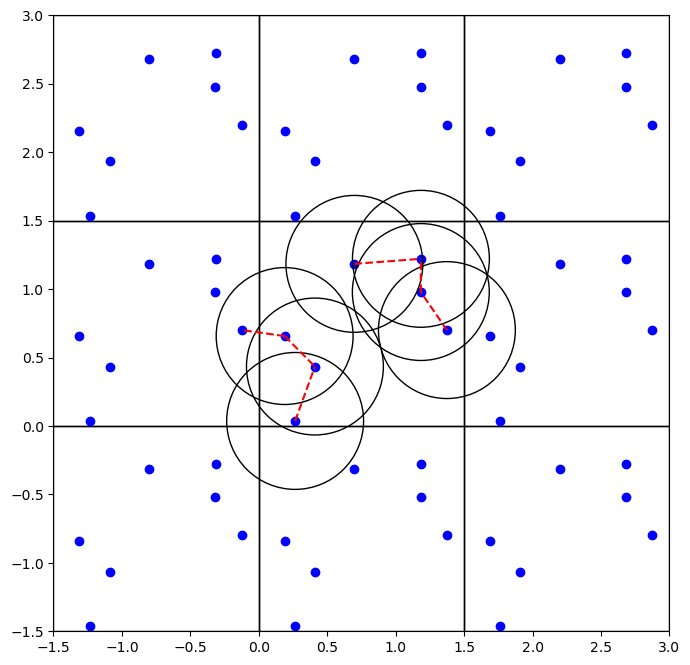

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la celda
L = 1.5
num_particulas = 7
rcut = 0.5

# Creamos partículas en la celda central al azar
particulas_centrales = L * np.random.rand(num_particulas,2)

# Inicializamos la figura
fig, ax = plt.subplots(figsize=(8, 8))

# Generamos la grilla de 3x3 celdas
for i in range(3):
    for j in range(3):
        # Graficamos cada celda
        ax.add_patch(plt.Rectangle(((i-1)*L, (j-1)*L), L, L, fill=None, alpha=1))

        # Graficamos las partículas y las replicas
        particulas = particulas_centrales + L * np.array([i-1,j-1])
        ax.scatter(particulas[:, 0], particulas[:, 1], color='blue')
        if(i==1 and j==1):
            for particula in particulas:
                ax.add_patch(plt.Circle(particula, rcut, fill=None, alpha=1))



for i in range(len(particulas_centrales)):
    for j in range(i+1,len(particulas_centrales)):
        dist_minima = float('inf')
        vecina_mas_cercana = None
        vec_flag = False
        for dx in [-1, 0, 1]:
            for dy in [-1, 0, 1]:
                vecina = particulas_centrales[j] + L * np.array([dx, dy])
                distancia = np.linalg.norm(particulas_centrales[i] - vecina)
                if distancia < dist_minima and distancia < rcut:
                    dist_minima = distancia
                    vecina_mas_cercana = vecina
                    vec_flag = True
        # Trazamos una línea a la partícula más cercana
        if vec_flag:
            ax.plot(*zip(particulas_centrales[i], vecina_mas_cercana), color='red', linestyle='--')


plt.xlim(-L, 2*L)
plt.ylim(-L, 2*L)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()
